### Project Scenario: 
You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

### Project Tasks:

Task 1: Familiarize yourself with the dataset 

Task 2: Generate basic statistics and visualizations for upper management. 

Task 3: Use the appropriate tests to answer the questions provided.

Task 4: Share your Jupyter Notebook.

Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [ ]:
# Import Necessary libraries
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
# load the data
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)
print(df.head())
print(df.info())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 no

### Task 2:
Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

In [9]:
# Compute statistics
stats = df[['MEDV', 'CRIM', 'NOX', 'DIS']].describe()
print(stats)


             MEDV        CRIM         NOX         DIS
count  506.000000  506.000000  506.000000  506.000000
mean    22.532806    3.613524    0.554695    3.795043
std      9.197104    8.601545    0.115878    2.105710
min      5.000000    0.006320    0.385000    1.129600
25%     17.025000    0.082045    0.449000    2.100175
50%     21.200000    0.256510    0.538000    3.207450
75%     25.000000    3.677083    0.624000    5.188425
max     50.000000   88.976200    0.871000   12.126500


C:\Users\Naveen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


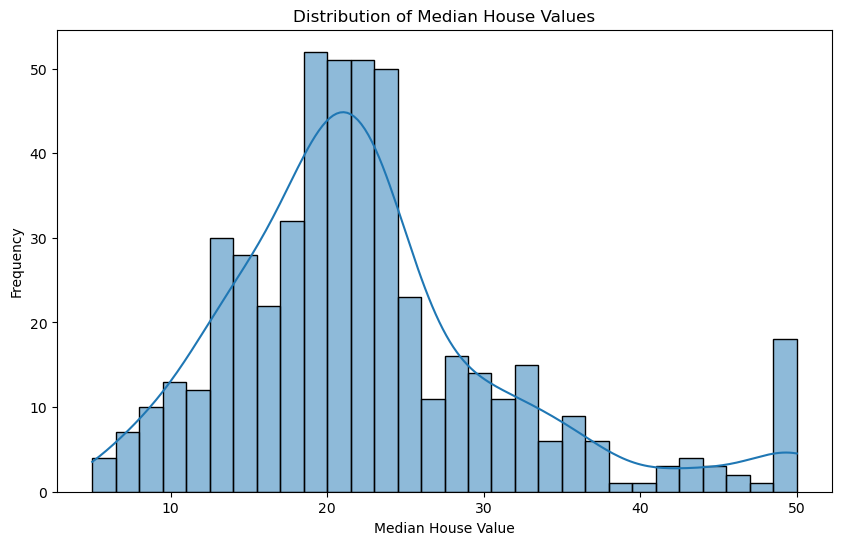

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for median house values
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


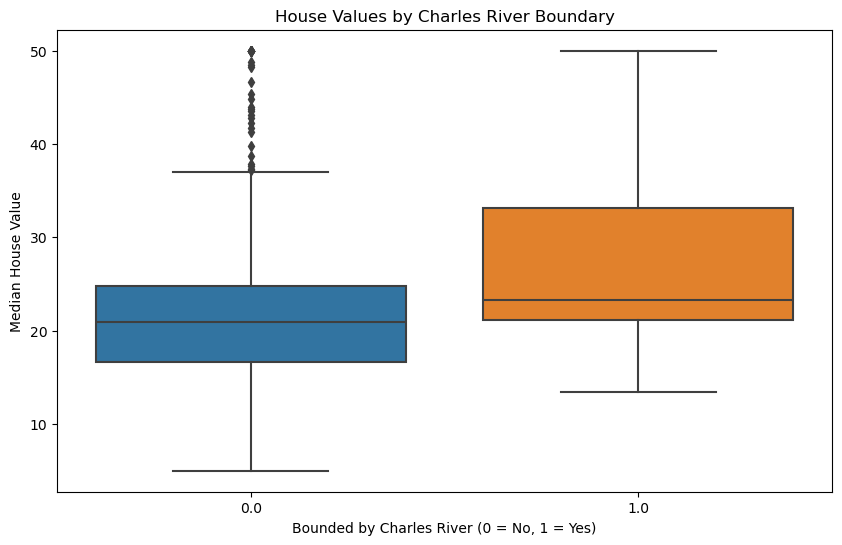

In [11]:
# Boxplot for house values by Charles River boundary
plt.figure(figsize=(10, 6))
sns.boxplot(x='CHAS', y='MEDV', data=df)
plt.title('House Values by Charles River Boundary')
plt.xlabel('Bounded by Charles River (0 = No, 1 = Yes)')
plt.ylabel('Median House Value')
plt.show()


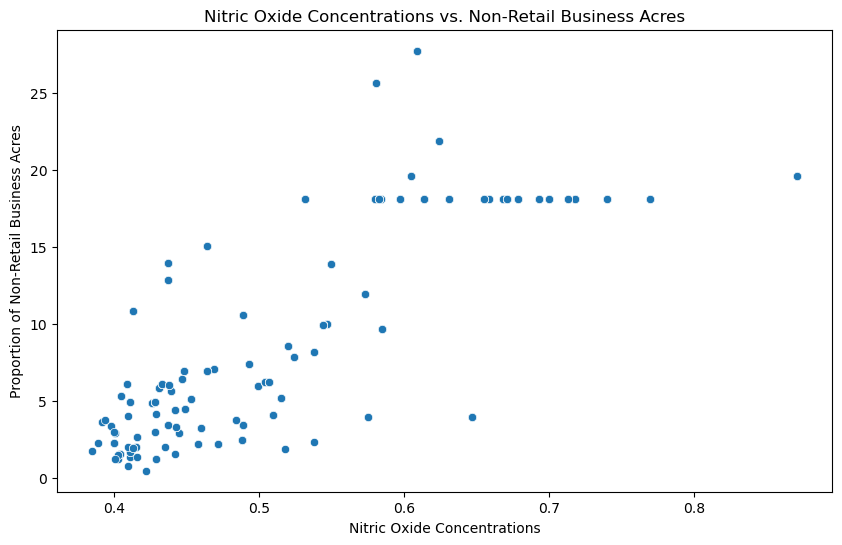

In [12]:
# Scatter plot for nitric oxide concentrations vs. non-retail business acres
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=df)
plt.title('Nitric Oxide Concentrations vs. Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()


### Task 3: 
Use the appropriate tests to answer the questions provided.
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [13]:
# two sample t test
from scipy.stats import ttest_ind

# Split data based on Charles River boundary
bounded = df[df['CHAS'] == 1]['MEDV']
not_bounded = df[df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_val = ttest_ind(bounded, not_bounded)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


In [14]:
# ANNOVA test
from scipy.stats import f_oneway

# Define groups based on proportion ranges
df['Age_Group'] = pd.cut(df['AGE'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
groups = [df[df['Age_Group'] == grp]['MEDV'] for grp in df['Age_Group'].unique()]

# Perform ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_val}")



F-statistic: 20.02910718694798, P-value: 2.5828143681068496e-15


In [15]:
# corelation test
correlation = df[['NOX', 'INDUS']].corr().iloc[0, 1]
print(f"Correlation coefficient: {correlation}")


Correlation coefficient: 0.7636514469209139


In [16]:
# linear regression test
import statsmodels.api as sm

# Define independent and dependent variables
X = df['DIS']
y = df['MEDV']

# Add constant to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        17:20:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

# Conclusion:
These visualizations and statistical analyses provide a comprehensive overview of the factors influencing housing prices in Boston. They will help upper management make informed decisions based on clear, actionable insights.